<a href="https://colab.research.google.com/github/6tfackr9/CS-450/blob/master/Prove08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

car_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
car_columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "acceptability"]
car_eval = pd.read_csv(car_url, names = car_columns)

In [2]:
car_eval

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
print(car_eval.isnull().sum())
num_missing = (car_eval.iloc[:,:] == '?').sum()
print(num_missing)

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64
buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
data = car_eval
data["buying"] = data["buying"].astype('category')
data["buying"] = data["buying"].cat.codes
data["maint"] = data["maint"].astype('category')
data["maint"] = data["maint"].cat.codes
data["doors"] = data["doors"].astype('category')
data["doors"] = data["doors"].cat.codes
data["persons"] = data["persons"].astype('category')
data["persons"] = data["persons"].cat.codes
data["lug_boot"] = data["lug_boot"].astype('category')
data["lug_boot"] = data["lug_boot"].cat.codes
data["safety"] = data["safety"].astype('category')
data["safety"] = data["safety"].cat.codes
data["acceptability"] = data["acceptability"].astype('category')
data["acceptability"] = data["acceptability"].cat.codes

In [6]:
data

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [7]:
targets = data[["acceptability"]]
features = data.iloc[:, data.columns != "acceptability"]

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sc = StandardScaler()
sc.fit(features)
features = sc.transform(features)

In [9]:
train_data, test_data, train_targets, test_targets = train_test_split(features, targets, test_size = 0.3)

In [10]:
from keras.utils import to_categorical
train_targets = to_categorical(train_targets)

In [11]:
classifier = Sequential()
classifier.add(Dense(36, activation="relu"))
classifier.add(Dense(18, activation="relu"))
classifier.add(Dense(4, activation="softmax"))
classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
classifier.fit(train_data, train_targets, epochs=50)

Epoch 1/50
1209/1209 [==============================] - 0s 323us/step - loss: 1.1966 - accuracy: 0.5012
Epoch 2/50
1209/1209 [==============================] - 0s 38us/step - loss: 0.9073 - accuracy: 0.7031
Epoch 3/50
1209/1209 [==============================] - 0s 39us/step - loss: 0.7475 - accuracy: 0.7146
Epoch 4/50
1209/1209 [==============================] - 0s 37us/step - loss: 0.6745 - accuracy: 0.7237
Epoch 5/50
1209/1209 [==============================] - 0s 38us/step - loss: 0.6311 - accuracy: 0.7312
Epoch 6/50
1209/1209 [==============================] - 0s 39us/step - loss: 0.5965 - accuracy: 0.7411
Epoch 7/50
1209/1209 [==============================] - 0s 36us/step - loss: 0.5663 - accuracy: 0.7527
Epoch 8/50
1209/1209 [==============================] - 0s 37us/step - loss: 0.5341 - accuracy: 0.7692
Epoch 9/50
1209/1209 [==============================] - 0s 37us/step - loss: 0.5038 - accuracy: 0.7808
Epoch 10/50
1209/1209 [==============================] - 0s 37us/step - 

In [13]:
pred_targets = classifier.predict_classes(test_data)

In [14]:
accuracy_score(pred_targets, test_targets)

0.9710982658959537

In [15]:
features.shape

(1728, 6)

In [16]:
train_targets.shape

(1209, 4)

In [17]:
classifier = Sequential()
classifier.add(Dense(36, activation="relu"))
classifier.add(Dense(18, activation="relu"))
classifier.add(Dense(4, activation="softmax"))
classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

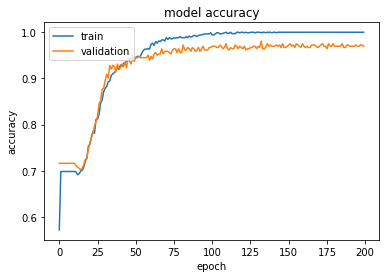

In [18]:
history = classifier.fit(train_data, train_targets, validation_split = 0.3, epochs = 200, verbose = 0)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()